In [121]:
from Bio import SeqIO
import numpy as np
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
#necessary for ANOVA analysis
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
#necessary for t-test
from scipy.stats import ttest_ind
import statsmodels.api as sm
#necessary for table customization
from tabulate import tabulate
#posthoc's Turkey HSD test 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [6]:
# Create a DataFrame with the data
data = pd.DataFrame({
    'Species': ['Zebrafish', 'Tuberculosis', 'Human', 'Mouse', 'Dog'],
    'Guanine-Cytosine Percent': [65.61503, 65.61507, 42.19234, 42.86997, 43.17497],
    'Group': ['A', 'A', 'B', 'B', 'C']  # Assign a group to each test subject
})

# Perform ANOVA test
groups = []
for group in data['Group'].unique():
    groups.append(data[data['Group'] == group]['Guanine-Cytosine Percent'])

result = f_oneway(*groups)

# Calculate sum of squares
mean_total = data['Guanine-Cytosine Percent'].mean()
ss_total = ((data['Guanine-Cytosine Percent'] - mean_total) ** 2).sum()
ss_between = sum(len(group) * (group.mean() - mean_total) ** 2 for group in groups)
ss_within = ss_total - ss_between

# Create dataframe
df = pd.DataFrame({
    'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
    'Sum of Squares': [ss_between, ss_within, ss_total],
    'Degrees of Freedom': [len(groups) - 1,
                           len(data) - len(groups),
                           len(data) - 1],
    'Mean Squares': [ss_between / (len(groups) - 1),
                     ss_within / (len(data) - len(groups)),
                     '-'],
    'F-value': [(ss_between / (len(groups) - 1)) / (ss_within / (len(data) - len(groups))), '-', '-'],
    'p-value': [result[1], '-', '-']
})

# View the dataframe
print(df)

  Source of Variation  Sum of Squares  Degrees of Freedom Mean Squares  \
0      Between Groups      627.881642                   2   313.940821   
1       Within Groups        0.229591                   2     0.114796   
2               Total      628.111233                   4            -   

       F-value   p-value  
0  2734.780848  0.000366  
1            -         -  
2            -         -  


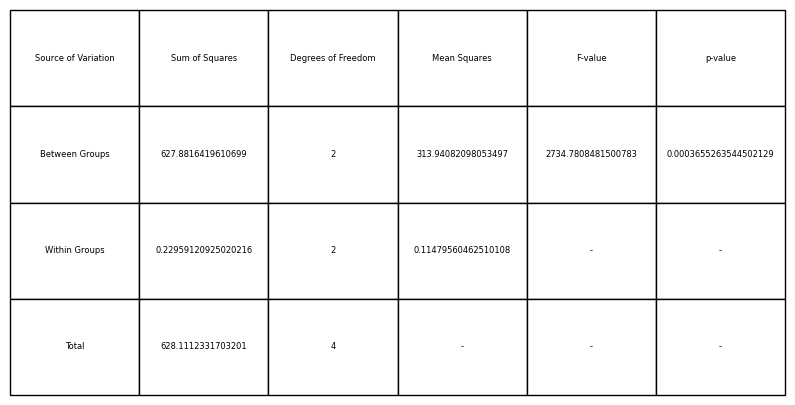

In [130]:
# Create a DataFrame with the data
data = pd.DataFrame({
    'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
    'Sum of Squares': [627.882, 0.229591, 628.111],
    'Degrees of Freedom': [2, 2, 4],
    'Mean Squares': [313.94082098053497, 0.11479560462510108, '-'],
    'F-value': [2734.7808481500783, '-', '-'],
    'p-value': [0.0003655263544502129, '-', '-']
})

# Remove columns with indices 0, 1, and 2
data = data.drop(data.columns[[5]], axis=1)

# Convert the DataFrame to a visually appealing table using the "pipe" format
table = tabulate(data, headers='keys', tablefmt='fancy_grid', floatfmt=".2f")

# Save the table to a file
with open('table.txt', 'w') as f:
    f.write(table)

# Create a plot of the table
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

# Save the plot as a PNG image
plt.savefig('anova.png', bbox_inches='tight')